  
  <font size="5"> <div class="alert alert-block alert-info"> Introdução a Modelos Dinâmicos (IMD): Semana 3 (Aula P6) </div> </font> 
    
  <font size="5"> Licenciatura em Ciência de Dados </font>
 
  
  
  <font size="4"> **Diana Aldea Mendes**</font>
  
  
    
  <font size="3"> diana.mendes@iscte-iul.pt </font> 
  
  
  <font size="4"> ISCTE-IUL, 28 de fevereiro de 2024 </font>
  
 
    
 
  
  <font size="5"> <div class="alert alert-success" role="alert"> Regressão Linear com variáveis categóricas, inter-ação, previsão </div></font> 
  

  

In [11]:
library(car) # para bases de dados e gráficos
library(lmtest) # para testes de hipótese sobre os pressupostos dos resíduos
library(tseries) # teste de Jarque-Bera

library(MASS)
# usar para fazer a escolha automática do modelo de regressão (stepAIC)
# com base no critério de informação de Akaike (AIC)


**Apresentação da bse de dados**

The data refers to an Italian restaurant which offers home delivery of pizza. 
- It contains the orders received during a period of one month: May 2014. 
- There are three branches of the restaurant. 
- The pizza delivery is centrally managed: an operator receives a phone call and forwards the order to the branch which is nearest to the customer’s address. 
- One of the five drivers (two of whom only work part time at the weekend) delivers the order. 
- The data set captures the number of pizzas ordered as well as the final bill (in e) which may also include drinks, salads, and pasta dishes.
- The owner of the business observed an increased number of complaints, mostly because pizzas arrive too late and too cold. 
- To improve the service quality of his business, the owner wants to measure 
 * (i) the time from call to delivery and 
 * (ii) the pizza temperature at arrival (which can be done with a special device)
- Ideally, a pizza arrives within 30 min of the call; if it takes longer than 40 min, then the customers are promised a free bottle of wine (which is not always handed out though). 
- The temperature of the pizza should be above 65◦C at the time of delivery. 
- The analysis of the data aims to determine the factors which influence delivery time and temperature of the pizzas.


Many variables could potentially be associated with delivery time—driver, amount of food ordered, operator handling the order,
whether it is a weekend, and so on. A reasonable question to ask is: Do different drivers have (on average) a different delivery time—given they deal with the same operator, the amount of food ordered is the same, the day is the same, etc. These kind of questions can be answered with multiple linear regression.



In [12]:
pizza <- read.csv("pizza_delivery.csv")
head(pizza)


,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,Thursday,01-May-14,35.12837,Laura,East,Bruno,68.28772,58.4,4,0,0,1
2,Thursday,01-May-14,25.20307,Melissa,East,Salvatore,70.99779,26.4,2,0,0,0
3,Thursday,01-May-14,45.64340,Melissa,West,Salvatore,53.39415,58.1,3,1,0,0
4,Thursday,01-May-14,29.37430,Melissa,East,Salvatore,70.30660,35.2,3,0,0,0
5,Thursday,01-May-14,29.99461,Melissa,West,Salvatore,71.50169,38.4,2,0,0,0
6,Thursday,01-May-14,40.25432,Melissa,Centre,Bruno,60.75950,61.8,4,1,1,0


In [ ]:
str(pizza)

'data.frame':	1266 obs. of  12 variables:
 $ day              : chr  "Thursday" "Thursday" "Thursday" "Thursday" ...
 $ date             : chr  "01-May-14" "01-May-14" "01-May-14" "01-May-14" ...
 $ time             : num  35.1 25.2 45.6 29.4 30 ...
 $ operator         : chr  "Laura" "Melissa" "Melissa" "Melissa" ...
 $ branch           : chr  "East" "East" "West" "East" ...
 $ driver           : chr  "Bruno" "Salvatore" "Salvatore" "Salvatore" ...
 $ temperature      : num  68.3 71 53.4 70.3 71.5 ...
 $ bill             : num  58.4 26.4 58.1 35.2 38.4 61.8 57.9 35.8 36.6 44.8 ...
 $ pizzas           : int  4 2 3 3 2 4 3 2 2 5 ...
 $ free_wine        : int  0 0 1 0 0 1 1 0 0 0 ...
 $ got_wine         : int  0 0 0 0 0 1 1 0 0 0 ...
 $ discount_customer: int  1 0 0 0 0 0 0 0 0 0 ...


## Regressão Linear com variáveis categóricas

#############################################################################################

Vamos supor que o gerente do restaurante suspeita que o tempo de entrega (DeliveryTime) é determinado (influenciado) por duas variáveis

1. quantidade encomendada - usamos como proxy a conta total (overall bill)
2. operador

isto é:



$$Delivery Time = β_0 + β_1Bill + β_2Operator + e$$

No que segue iremos analisar este problema de regressão linear múltipla:


In [14]:
# modelo de regressão linear múltipla e o seu output

model1 <- lm(time ~ bill + operator, data = pizza)
summary(model1)



Call:
lm(formula = time ~ bill + operator, data = pizza)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.1788  -3.8963  -0.2872   3.9350  17.9688 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     23.11140    0.65754  35.148   <2e-16 ***
bill             0.25817    0.01448  17.830   <2e-16 ***
operatorMelissa  0.16107    0.32488   0.496     0.62    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.779 on 1263 degrees of freedom
Multiple R-squared:  0.2014,	Adjusted R-squared:  0.2001 
F-statistic: 159.3 on 2 and 1263 DF,  p-value: < 2.2e-16


############################################################################


Interpretação dos parâmetros: 

- Para cada extra euro gasto, o tempo de entrega aumenta com 0.26 min. (ou, para cada 10 euros (extra) gastos, o tempo de entrega aumenta em média com 2.6 min.)
- O tempo de entrega está, em média, 0.16 min maior para o operador 1 em comparação com o operador 0. 
- Para o operador 0 e uma conta de 0 euros, a expectativa do tempo de entrega é $β_0=23.1$ min
- Contudo, não existem contas de 0 euros e portanto o intercept não pode ser interpretado (neste caso em particular), mas incluímos o intercept pelas razões de estimação/ajustamento.



####################################################################################################

Relembramos que numa variável categórica com duas categorias (i.e, binária), uma das categorias é substituída por 1's e a outra por 0's. Os sujeitos que pertencem a categoria x=1 tem, em média, valores de y que são $β_1$ unidades maiores do que dos sujeitos com x=0.

Agora, para uma variável x que tem mais que $k>2$ categorias, para podermos incluir na regressão, temos de criar $(k-1)$ novas variáveis $x_i$, $i=1,2,...,k-1$, onde $x_i=1$ para categoria $i$, e 0 nas outras entradas.

A variável para a qual não criamos uma variável dummy chama-se categoria de referência (reference
category) e a interpretação dos parâmetros das variáveis dummy estão com respeito a esta categoria de referência.
por exemplo, para a categoria $i$, os valores de $y$, são em média $β_i$ maiores do que para a categoria de referência.

~#####################################################################################################

O gerente ponha agora uma hipótese diferente acerca os atrasos no tempo de entrega das pizzas, considerando que o tempo varía com relação a filial (branch: East, West, Centre). 


Então, em vez de usar a variável "branch" na regressão, vamos criar 2 novas variáveis x1=East e x2=West. 

- Escolhemos x1=1 para as entregas da filial East e x1=0 para as outras entregas. 
- Analogamente, escolhemos x2=1 para as entregas que provem da filial West e x2=0 para as outras entregas.

Agora:
- as entregas que vem da filial East tem: x1=1 e x2=0
- as entregas que vem da filial West tem: x1=0 e x2=1
- as entregas que vem da filial Centre tem: x1=0 e x2=0

Então o modelo de regressão de interesse será:

$$y = β_0 + β_1East + β_2West + e$$


Podemos ser nós próprios a criar as variáveis dummy (*opção 1*) ou podemos usar as funções de R para as definir (*opção 2*) (neste caso as variáveis devem ser de tipo "factor")



In [15]:
# regressão com variável categórica - opção 1
East <- as.numeric(pizza$branch == "East")
West <- as.numeric(pizza$branch == "West")
modelo2 <- lm(time ~ East + West, data = pizza)
summary(modelo2)



Call:
lm(formula = time ~ East + West, data = pizza)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.8006  -4.1262  -0.0904   4.1304  18.6637 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.3127     0.2957 122.819  < 2e-16 ***
East         -5.2461     0.4209 -12.463  < 2e-16 ***
West         -1.1182     0.4148  -2.696  0.00711 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.066 on 1263 degrees of freedom
Multiple R-squared:  0.1199,	Adjusted R-squared:  0.1185 
F-statistic: 86.05 on 2 and 1263 DF,  p-value: < 2.2e-16


In [16]:
# regressão com variável categórica - opção 2
modelo2n <- lm(time ~ as.factor(pizza$branch), data=pizza)
summary(modelo2n)


Call:
lm(formula = time ~ as.factor(pizza$branch), data = pizza)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.8006  -4.1262  -0.0904   4.1304  18.6637 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  36.3127     0.2957 122.819  < 2e-16 ***
as.factor(pizza$branch)East  -5.2461     0.4209 -12.463  < 2e-16 ***
as.factor(pizza$branch)West  -1.1182     0.4148  -2.696  0.00711 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.066 on 1263 degrees of freedom
Multiple R-squared:  0.1199,	Adjusted R-squared:  0.1185 
F-statistic: 86.05 on 2 and 1263 DF,  p-value: < 2.2e-16


#########################################################################################

A interpretação dos parâmetros é a seguinte:

- O tempo de entrega médio para a filial do Centre é 36.3 min
- O tempo de entrega médio para a filial do East é 36.3-5.2 =31.1 min
- O tempo de entrega médio para a filial do Weat é 36.3-1.1 =35.2 min

Portanto, as entregas chegam, em média, 5.2 min mais cedo no East comparando com o Centre e as entregas do West chegam, em média, 1.1 min mais rápido do que na zona Centre  (ou: leva-se menos 5.2 minutos para entregar uma pizza na zona East comparando com a zona Centre, ...)



## Regressão linear múltipla e pressupostos dos resíduos

In [17]:
# iniciamos com o modelo de regressão múltipla com 8 variáveis indep

mp <- lm(time ~ temperature + branch + day + operator + driver + bill + pizzas + discount_customer, data = pizza)
summary(mp)



Call:
lm(formula = time ~ temperature + branch + day + operator + driver + 
    bill + pizzas + discount_customer, data = pizza)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.461  -3.768  -0.486   3.504  18.026 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       40.42270    2.00446  20.166  < 2e-16 ***
temperature       -0.20823    0.02594  -8.027 2.28e-15 ***
branchEast        -1.60263    0.42331  -3.786 0.000160 ***
branchWest        -0.11912    0.37330  -0.319 0.749708    
dayMonday         -1.15858    0.63300  -1.830 0.067443 .  
daySaturday        0.88163    0.50161   1.758 0.079061 .  
daySunday          1.01655    0.56103   1.812 0.070238 .  
dayThursday        0.78895    0.53006   1.488 0.136895    
dayTuesday         0.79284    0.62538   1.268 0.205117    
dayWednesday       0.25814    0.60651   0.426 0.670468    
operatorMelissa   -0.15791    0.34311  -0.460 0.645435    
driverDomenico    -2.59296    0.73434  -3.531 0.00042

In [18]:
# verificar se existe multicolinearidade
vif(mp)


,GVIF,Df,GVIF^(1/(2*Df))
temperature,1.405978,1,1.185739
branch,1.326838,2,1.073259
day,2.292401,6,1.071579
operator,1.290577,1,1.136036
driver,1.971694,4,1.088566
bill,1.413641,1,1.188966
pizzas,1.295020,1,1.137989
discount_customer,1.015089,1,1.007516


In [19]:
# escolher o melhor modelo com base no AIC
stepAIC(mp, direction = "both")


Start:  AIC=4275.15
time ~ temperature + branch + day + operator + driver + bill + 
    pizzas + discount_customer

                    Df Sum of Sq   RSS    AIC
- operator           1      6.11 36035 4273.4
- discount_customer  1     17.05 36046 4273.8
<none>                           36029 4275.2
- day                6    448.79 36478 4278.8
- driver             4    363.91 36393 4279.9
- branch             2    511.10 36540 4289.0
- pizzas             1    650.39 36679 4295.8
- temperature        1   1860.36 37889 4336.9
- bill               1   2241.30 38270 4349.6

Step:  AIC=4273.37
time ~ temperature + branch + day + driver + bill + pizzas + 
    discount_customer

                    Df Sum of Sq   RSS    AIC
- discount_customer  1     17.57 36053 4272.0
<none>                           36035 4273.4
+ operator           1      6.11 36029 4275.2
- day                6    452.00 36487 4277.1
- driver             4    364.61 36400 4278.1
- branch             2    508.57 36544 4287


Call:
lm(formula = time ~ temperature + branch + day + driver + bill + 
    pizzas, data = pizza)

Coefficients:
    (Intercept)      temperature       branchEast       branchWest  
        40.3450          -0.2091          -1.6000          -0.1094  
      dayMonday      daySaturday        daySunday      dayThursday  
        -1.0819           0.8858           1.0444           0.7995  
     dayTuesday     dayWednesday   driverDomenico      driverLuigi  
         0.7258           0.2696          -2.6061          -0.8375  
    driverMario  driverSalvatore             bill           pizzas  
        -0.4035          -0.5162           0.1405           0.5587  


In [20]:
# modelo escolhido
mps <- lm(time ~ temperature + branch + day + driver + bill + pizzas, data = pizza)
summary(mps)



Call:
lm(formula = time ~ temperature + branch + day + driver + bill + 
    pizzas, data = pizza)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3213  -3.8093  -0.4746   3.4627  18.0159 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     40.34498    2.00023  20.170  < 2e-16 ***
temperature     -0.20905    0.02591  -8.070 1.64e-15 ***
branchEast      -1.59998    0.42309  -3.782 0.000163 ***
branchWest      -0.10943    0.37254  -0.294 0.769014    
dayMonday       -1.08192    0.60170  -1.798 0.072402 .  
daySaturday      0.88582    0.50045   1.770 0.076961 .  
daySunday        1.04440    0.55864   1.870 0.061778 .  
dayThursday      0.79947    0.52913   1.511 0.131059    
dayTuesday       0.72581    0.60527   1.199 0.230700    
dayWednesday     0.26957    0.60587   0.445 0.656449    
driverDomenico  -2.60607    0.73383  -3.551 0.000398 ***
driverLuigi     -0.83754    0.58583  -1.430 0.153061    
driverMario     -0.40353    0.43606  -0.9

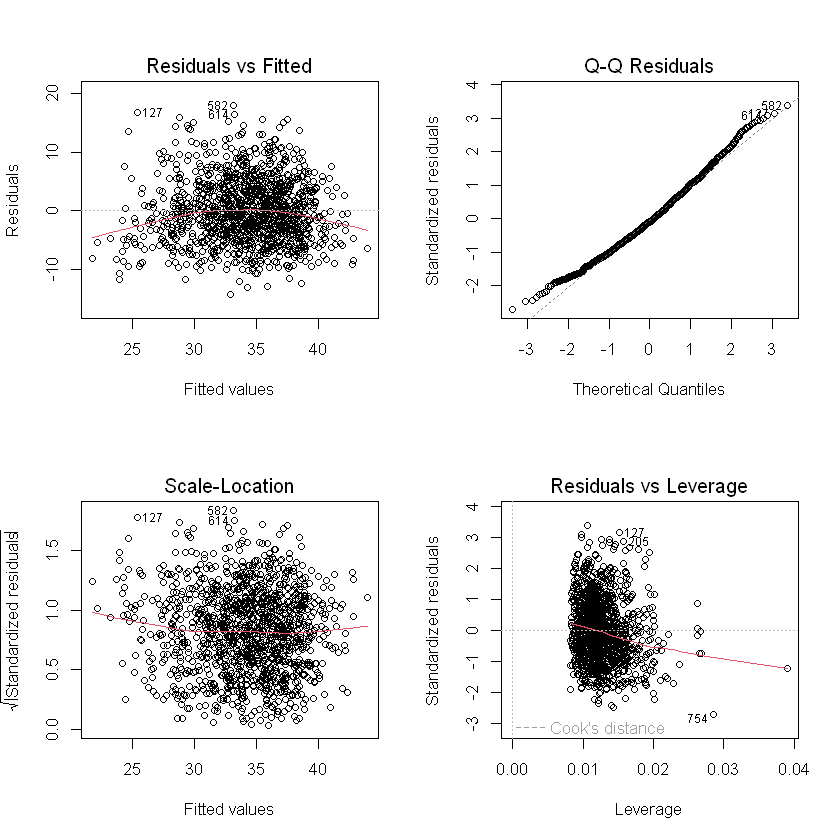

In [21]:
# gráficos associados com os resíduos da regressão
par(mfrow = c(2, 2))
plot(mps)


In [22]:
# adicionar um termo de não-linearidade (para a variável temperature)
# pois observamos um padrão não-linear nos resíduos (curvatura)
# mps <- lm(time ~ temperature + branch + day + driver + bill + pizzas, data=pizza)
mps2 <- lm(time ~ temperature + I(temperature^2) + branch + day + driver + bill + pizzas, data = pizza)
summary(mps2)



Call:
lm(formula = time ~ temperature + I(temperature^2) + branch + 
    day + driver + bill + pizzas, data = pizza)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.4394  -3.6940  -0.6371   3.3585  18.2713 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -18.954965   8.795301  -2.155  0.03134 *  
temperature        1.736692   0.282453   6.149 1.05e-09 ***
I(temperature^2)  -0.015544   0.002247  -6.917 7.36e-12 ***
branchEast        -1.429772   0.416107  -3.436  0.00061 ***
branchWest        -0.204927   0.366010  -0.560  0.57565    
dayMonday         -0.917746   0.591211  -1.552  0.12084    
daySaturday        0.734181   0.491817   1.493  0.13574    
daySunday          1.066199   0.548463   1.944  0.05212 .  
dayThursday        0.754740   0.519523   1.453  0.14654    
dayTuesday         0.689329   0.594264   1.160  0.24628    
dayWednesday       0.343759   0.594927   0.578  0.56349    
driverDomenico    -2.197420   0.722871  -3.

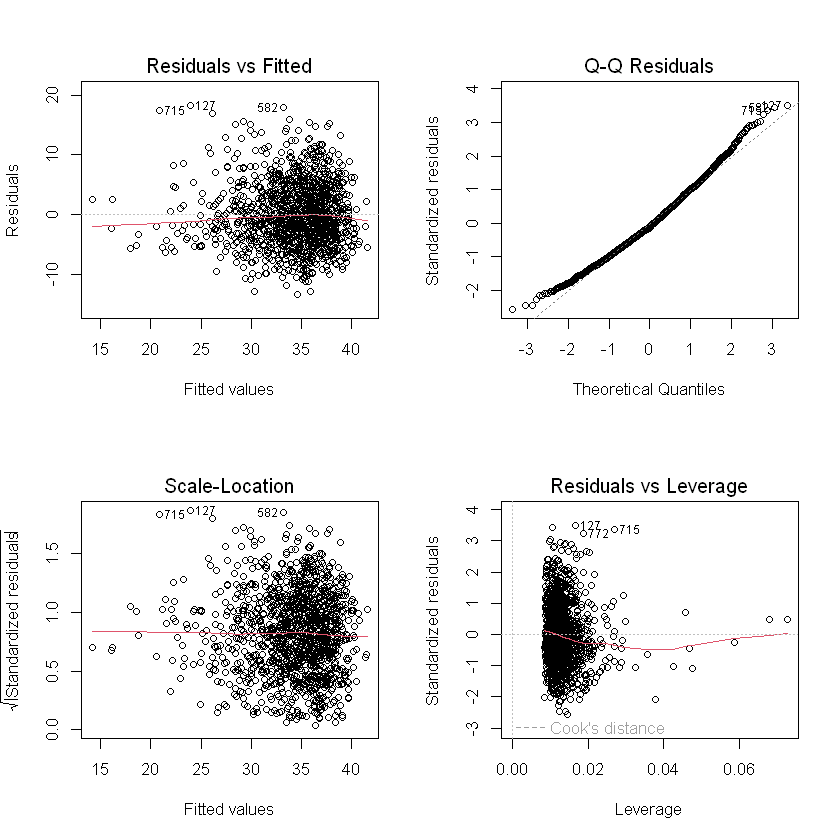

In [23]:
par(mfrow = c(2, 2))
plot(mps2)


In [24]:
# verificação dos pressupostos dos resíduos

# a média dos resíduos é nula (pois o intercept é diferente de zero)


In [25]:
# os resíduos tem a variância constante (homocedásticos)
# teste de Breusch-Pagan (H0: erros homocedásticos)

bptest(mps2)



	studentized Breusch-Pagan test

data:  mps2
BP = 19.125, df = 16, p-value = 0.2622


In [26]:
# os resíduos são independentes (ausência de correlação)
# teste de Breusch-Godfrey (H0:resíduos independentes)

bgtest(mps2)



	Breusch-Godfrey test for serial correlation of order up to 1

data:  mps2
LM test = 0.43195, df = 1, p-value = 0.511


In [27]:
# os resíduos são normalmente distribuídos
# Teste de Jarque-Bera (H0: distribuição normal)

jarque.bera.test(mps2$residuals)



	Jarque Bera Test

data:  mps2$residuals
X-squared = 41.702, df = 2, p-value = 8.8e-10


In [28]:
# o pressuposto de normalidade dos resíduos não é verificado


## Influence

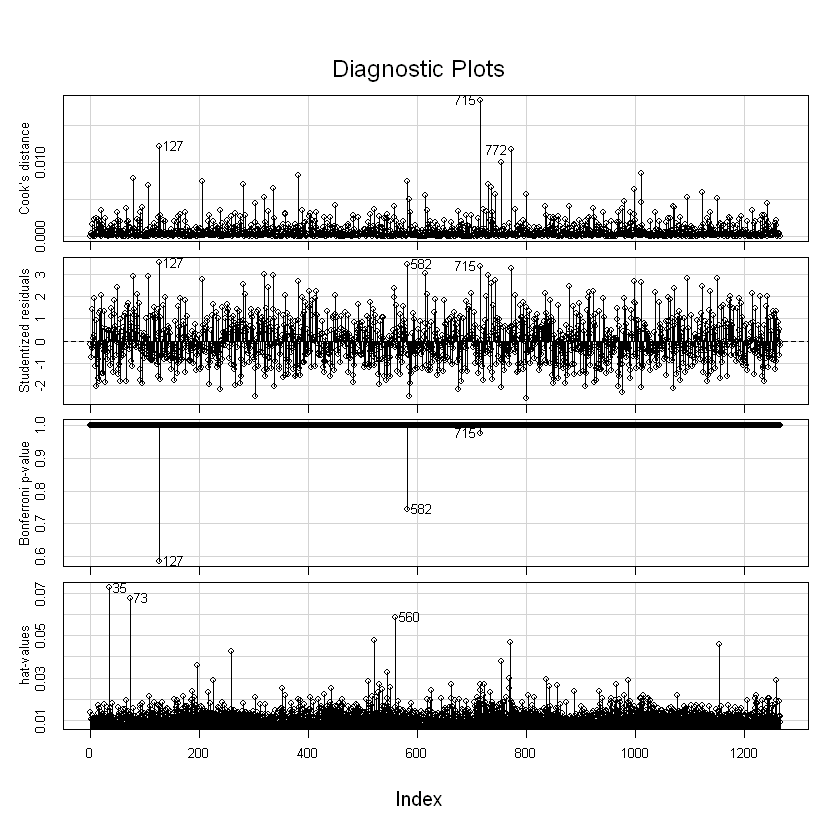

In [29]:
# vamos ver se existem elementos influenciadores
influenceIndexPlot(mps2, id = list(n = 3))


In [30]:
# distância de Cook

cooksd <- cooks.distance(mps2)


In [31]:
# Geralmente, as observações que tem uma distância de Cook maior que 4*(média), podem ser clasificados como infuenciadores


In [32]:
# detetar se existem influenciadores
influential <- as.numeric(names(cooksd)[(cooksd > 4 * mean(cooksd, na.rm = T))])
# visualizar os influenciadores
head(pizza[influential, ])


,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
21,Thursday,01-May-14,47.78338,Melissa,Centre,Mario,66.10353,63.7,2,1,1,1
50,Thursday,01-May-14,48.50989,Melissa,West,Mario,58.99079,43.3,2,1,1,1
67,Friday,02-May-14,26.14416,Melissa,West,Salvatore,47.42635,47.0,4,0,0,1
79,Friday,02-May-14,43.55575,Melissa,East,Luigi,73.97554,47.6,1,1,0,1
96,Friday,02-May-14,26.09400,Melissa,West,Luigi,50.63594,43.2,5,0,0,0
106,Saturday,03-May-14,45.03009,Melissa,West,Mario,70.08782,23.7,1,1,1,1


In [33]:
# avPlots (mps2, id=list (cex=0.75, n=3, method="mahal"))
# from car library


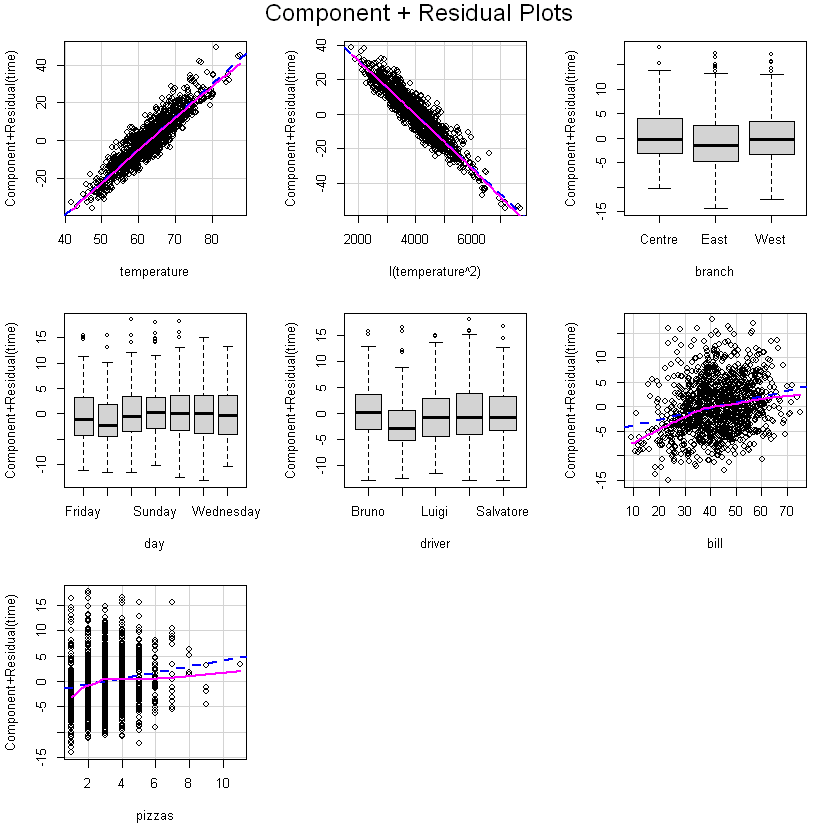

In [34]:
crPlots(mps2)


## Outliers

In [35]:
pizza <- read.csv("pizza_delivery.csv")


In [36]:
# vamos fazer um teste de outlier para o modelo ()
outlierTest(mps2)


No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
    rstudent unadjusted p-value Bonferroni p
127 3.510461         0.00046327       0.5865

In [37]:
# o output sugere que existem outliers, sendo o valor mais extremo na linha 127


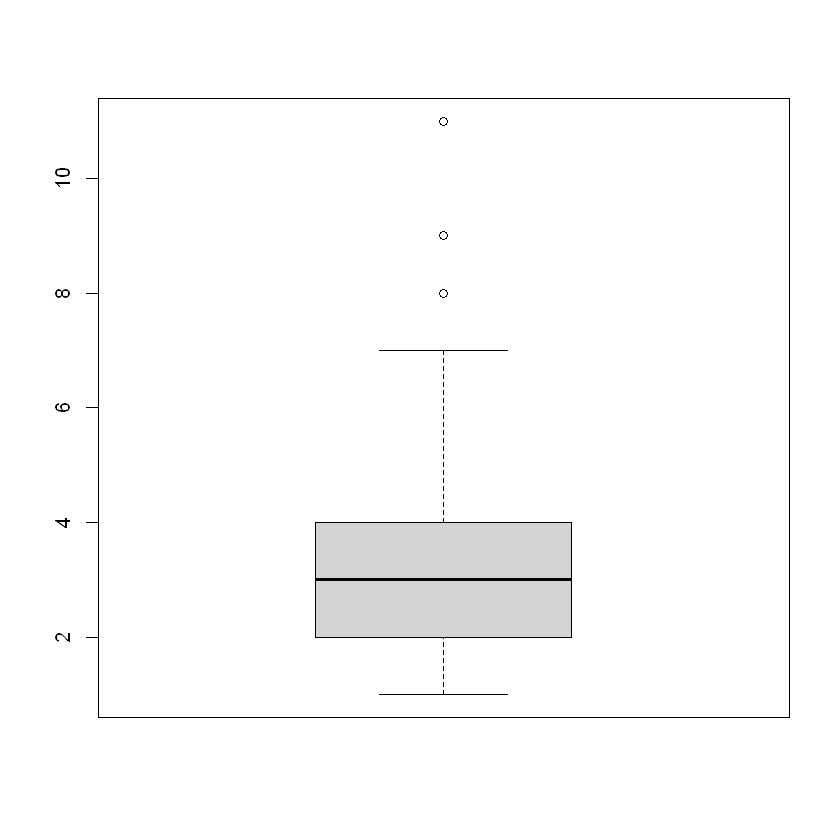

In [38]:
boxplot(pizza$pizzas)


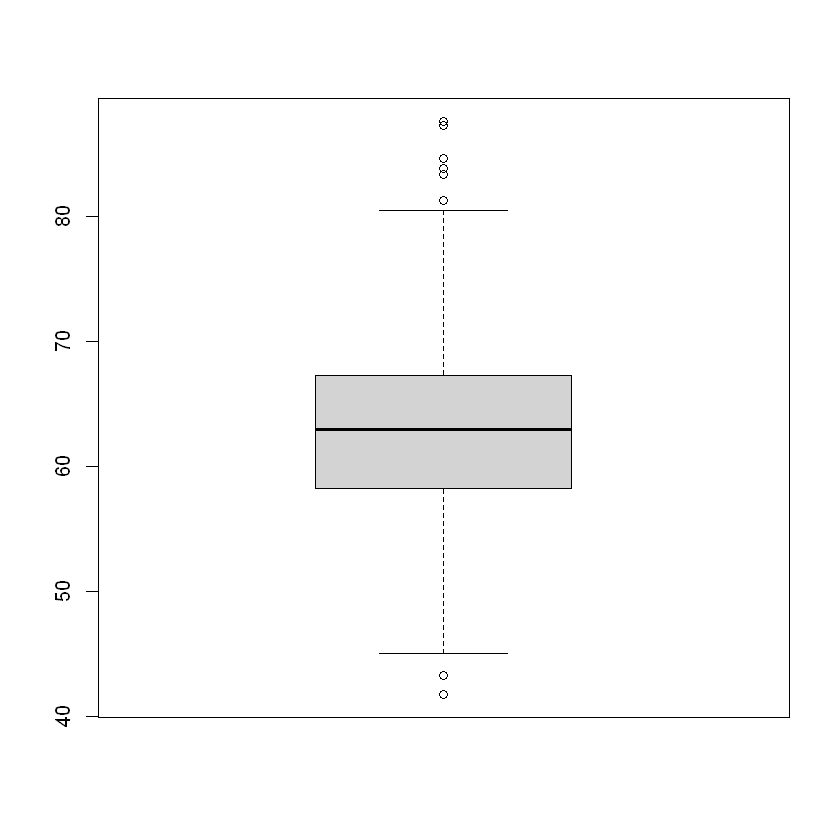

In [39]:
boxplot(pizza$temperature)


In [40]:
# remover outliers


In [41]:
# obter os valores actuais dos outliers na variável definida "pizzas"

boxplot(pizza$pizzas, plot = FALSE)$out


[1]  9  9 11  8  8  9  9  8  8

In [42]:
# guardar os outliers num vetor

outliers <- boxplot(pizza$pizzas, plot = FALSE)$out


In [43]:
# afixar os outliers

print(outliers)


[1]  9  9 11  8  8  9  9  8  8


In [44]:
# identificar as linhas onde temos os outliers

pizza[which(pizza$pizzas %in% outliers), ]


,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
358,Friday,09-May-14,31.37855,Melissa,Centre,Salvatore,56.39617,44.3,9,0,0,1
530,Tuesday,13-May-14,35.14902,Melissa,Centre,Mario,63.11195,46.3,9,0,0,1
560,Wednesday,14-May-14,37.44287,Melissa,West,Salvatore,43.25447,48.4,11,0,0,0
618,Friday,16-May-14,38.68589,Laura,Centre,Bruno,49.78358,54.9,8,0,0,0
643,Friday,16-May-14,37.21598,Melissa,West,Mario,62.98484,46.3,8,0,0,0
857,Wednesday,21-May-14,39.23247,Melissa,Centre,Mario,63.34821,49.1,9,0,0,0
887,Thursday,22-May-14,36.02981,Melissa,West,Bruno,55.10237,52.2,9,0,0,0
971,Saturday,24-May-14,42.86296,Laura,West,Bruno,64.00714,48.3,8,1,0,0
1022,Sunday,25-May-14,43.63154,Laura,Centre,Salvatore,63.37152,64.4,8,1,1,0


In [45]:
# remover os outliers do data frame original (atenção que temos "-which()")
# pizza[which(pizza$pizzas %in% outliers),]
pizza <- pizza[-which(pizza$pizzas %in% outliers), ]


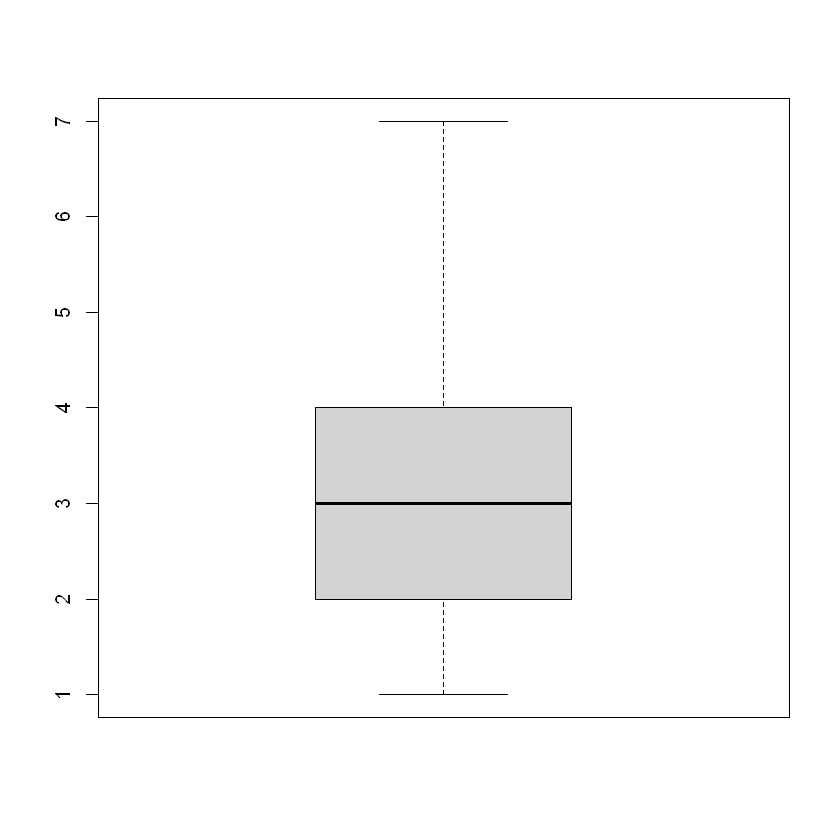

In [46]:
# visualizar novamente o boxplot
boxplot(pizza$pizzas)


In [47]:
# avaliar o modelo depois de remover os outliers
mps2 <- lm(time ~ temperature + I(temperature^2) + branch + day + driver + bill + pizzas, data = pizza)
summary(mps2)



Call:
lm(formula = time ~ temperature + I(temperature^2) + branch + 
    day + driver + bill + pizzas, data = pizza)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5653  -3.6698  -0.6165   3.3467  18.2489 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -18.478642   8.932786  -2.069 0.038788 *  
temperature        1.720494   0.286735   6.000 2.58e-09 ***
I(temperature^2)  -0.015418   0.002279  -6.765 2.05e-11 ***
branchEast        -1.431866   0.417465  -3.430 0.000624 ***
branchWest        -0.212924   0.368651  -0.578 0.563656    
dayMonday         -0.956769   0.593499  -1.612 0.107199    
daySaturday        0.667061   0.494687   1.348 0.177759    
daySunday          0.994798   0.551822   1.803 0.071670 .  
dayThursday        0.746135   0.522614   1.428 0.153631    
dayTuesday         0.685410   0.598046   1.146 0.251982    
dayWednesday       0.309251   0.600103   0.515 0.606415    
driverDomenico    -2.138775   0.725002  -2.

In [48]:
# os resíduos ainda não verificam a condição de normalidade
jarque.bera.test(mps2$residuals)



	Jarque Bera Test

data:  mps2$residuals
X-squared = 40.999, df = 2, p-value = 1.251e-09


In [49]:
# modelo de intera-acção
mps4 <- lm(time ~ temperature + I(temperature^2) + branch * driver + day + bill + pizzas, data = pizza)
summary(mps4)



Call:
lm(formula = time ~ temperature + I(temperature^2) + branch * 
    driver + day + bill + pizzas, data = pizza)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.5264  -3.6725  -0.5709   3.2948  18.0512 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -18.135022   8.971116  -2.021  0.04344 *  
temperature                  1.727433   0.287824   6.002 2.56e-09 ***
I(temperature^2)            -0.015443   0.002287  -6.751 2.25e-11 ***
branchEast                  -3.028157   0.769960  -3.933 8.86e-05 ***
branchWest                  -0.558293   0.682003  -0.819  0.41317    
driverDomenico              -5.702020   1.448166  -3.937 8.70e-05 ***
driverLuigi                 -1.258508   0.945239  -1.331  0.18330    
driverMario                 -1.135222   0.698977  -1.624  0.10461    
driverSalvatore             -1.109263   0.685458  -1.618  0.10586    
dayMonday                   -0.946946   0.590900  -1.603  0.109

In [50]:
jarque.bera.test(mps4$residuals)



	Jarque Bera Test

data:  mps4$residuals
X-squared = 41.06, df = 2, p-value = 1.213e-09


In [51]:
# vamos logaritmizar as variáveis (time) e (bill) e correr um novo modelo de regressão
mps5 <- lm(log(time) ~ temperature + I(temperature^2) + branch * driver + day + log(bill) + pizzas, data = pizza)
summary(mps5)



Call:
lm(formula = log(time) ~ temperature + I(temperature^2) + branch * 
    driver + day + log(bill) + pizzas, data = pizza)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49690 -0.10329 -0.00625  0.10393  0.56944 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.069e+00  2.661e-01   4.017 6.25e-05 ***
temperature                 6.488e-02  8.729e-03   7.433 1.98e-13 ***
I(temperature^2)           -5.723e-04  6.959e-05  -8.224 4.94e-16 ***
branchEast                 -8.788e-02  2.290e-02  -3.837 0.000131 ***
branchWest                 -1.408e-02  2.027e-02  -0.695 0.487470    
driverDomenico             -1.733e-01  4.301e-02  -4.029 5.93e-05 ***
driverLuigi                -3.121e-02  2.809e-02  -1.111 0.266898    
driverMario                -3.226e-02  2.078e-02  -1.553 0.120725    
driverSalvatore            -2.958e-02  2.037e-02  -1.452 0.146627    
dayMonday                  -2.905e-02  1.757e-02  -1.

In [52]:
jarque.bera.test(mps5$residuals)



	Jarque Bera Test

data:  mps5$residuals
X-squared = 3.8951, df = 2, p-value = 0.1426


In [53]:
# finalmente os resíduos são normalmente distribuídos (pressuposto verificado)


## Previsão

In [54]:
# previsão in-sample e erros de previsão
pr <- predict(mps5, pizza)
# pr


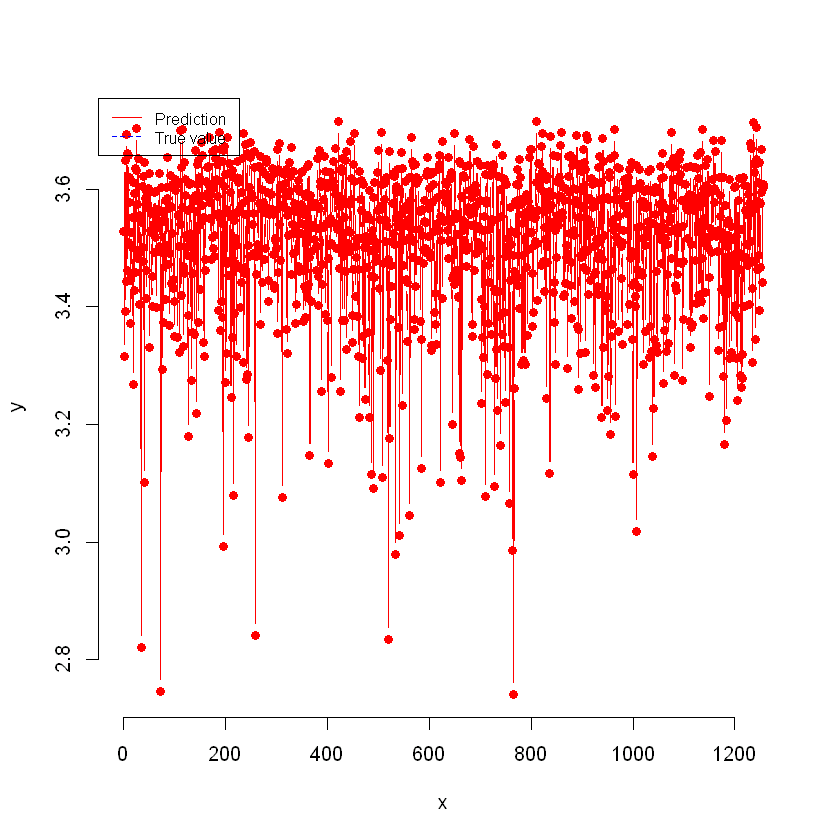

In [55]:
# representar os valores observados e os valores préditos
plot(pr, type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y")

lines(pizza$time, pch = 18, col = "blue", type = "b", lty = 2)

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)


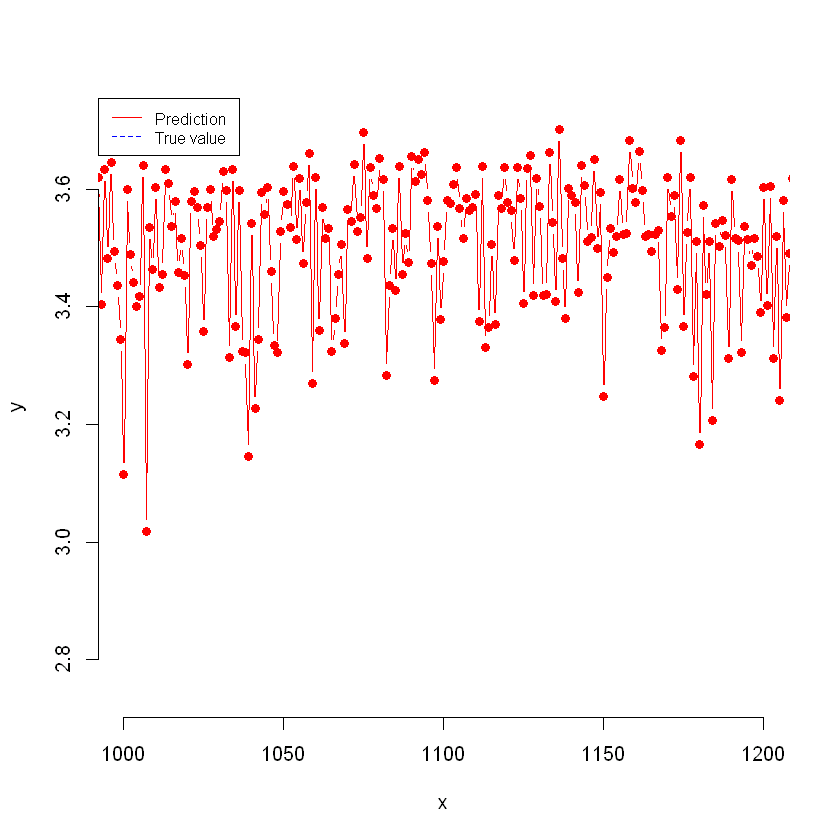

In [56]:
# fazer um zoom na figura (identificar os valores limite no eixo do x)

plot(pr, type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y", xlim = c(1000, 1200))

lines(pizza$time, pch = 18, col = "blue", type = "b", lty = 2, xlim = c(1000, 1200))

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)


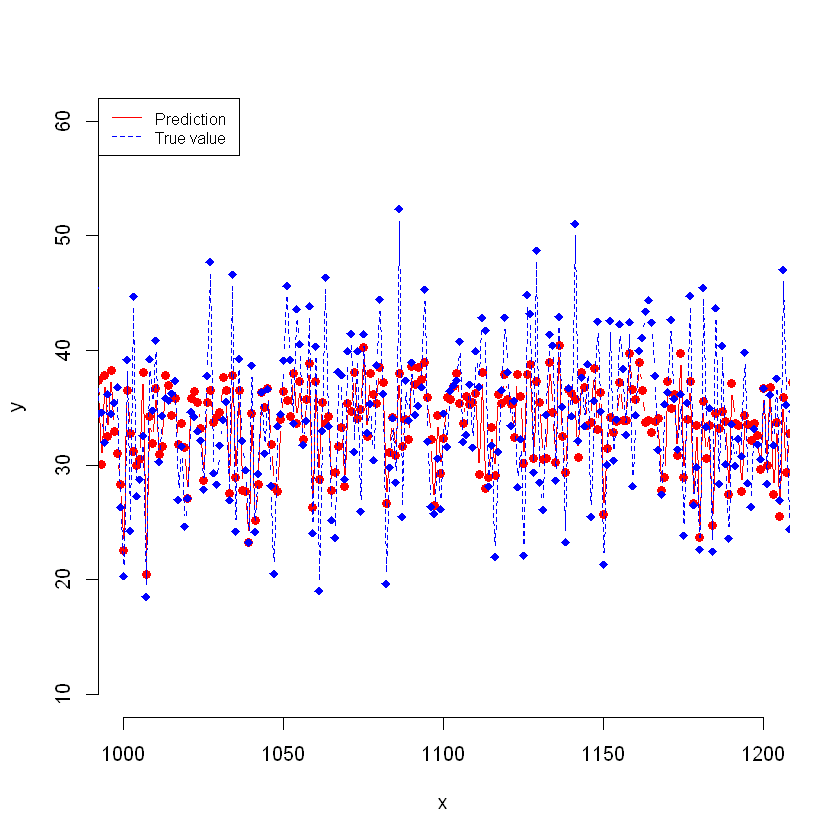

In [57]:
# fazer um zoom na figura (identificar os valores limite no eixo do x) e
# fazer a transformação inversa na variável dependente (que foi logaritmizada)

plot(exp(pr), type = "b", frame = FALSE, pch = 19, col = "red", xlab = "x", ylab = "y", xlim = c(1000, 1200), ylim = c(10, 60))

lines(pizza$time, pch = 18, col = "blue", type = "b", lty = 2, xlim = c(1000, 1200), ylim = c(10, 60))

legend("topleft", legend = c("Prediction", "True value"), col = c("red", "blue"), lty = 1:2, cex = 0.8)


In [58]:
# erro de previsão
# calcular vários erros de previsão

actual <- pizza$time
# prediction<-exp(pr)
prediction <- exp(mps5$fitted.values)
n <- length(pizza$time)

# o MAPE é uma das melhores métricas, pois é dada por uma percentagem (não é dependente de escala)
MAPE <- (1 / n) * sum(abs((actual - prediction) / actual))
MAPE


[1] 0.1231571

In [59]:
MAE <- mean(abs(actual - prediction))
MAE


[1] 4.113964

In [60]:
RMSE <- sqrt(mean((actual - prediction)^2))
RMSE


[1] 5.209393

In [61]:
# e agora usando a biblioteca Metrics
library(Metrics)
result <- rmse(actual, prediction)
result


Warning message:
"package 'Metrics' was built under R version 4.3.3"


[1] 5.209393

In [62]:
result <- mape(actual, prediction)
result


[1] 0.1231571

## TPC 1

1. Elimina os outliers que correspondem a variável temperature
2. Actualiza a base de dados depois de eliminar os outliers
3. Determina um novo modelo de regressão linear para a base de dados actualizada
4. Verifica os pressupostos dos resíduos
5. Determine o erro de previsão em termos percentuais (sobre os valores ajustados - in-sample)
6. Faça a previsão do tempo de entrega um passo fora de amostra (out-of-sample)



## TPC 2

1. Importa a base de dados mtcars
2. Corre uma regressão linear simples mpg ~ cyl
3. Escolha a variável categórica cyl e cria as duas novas variáveis associadas (dummy's)
4. Corre a regressão linear com as variáveis dummy.